# Portfolio Optimization

“Modern Portfolio Theory (MPT), a hypothesis put forth by Harry Markowitz in his paper “Portfolio Selection,” (published in 1952 by the Journal of Finance) is an investment theory based on the idea that risk-averse investors can construct portfolios to optimize or maximize expected return based on a given level of market risk, emphasizing that risk is an inherent part of higher reward. It is one of the most important and influential economic theories dealing with finance and investment.

## Monte Carlo Simulation for Optimization Search


We could randomly try to find the optimal portfolio balance using Monte Carlo simulation

In [299]:
#!pip install yfinance

In [300]:
import numpy as nps
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
from scipy.optimize import minimize

In [301]:
tickers = ['VGT', '^GSPC', 'BTC-USD', '^NSEI', 'HDFCSML250.NS', '0P0001QRWU.BO', 'VCLT', 'VNQ']
#tickers = symbols_list
end_date = datetime.today()
print(end_date)
start_date = end_date - timedelta(days = 5*365)
print(start_date)
stocks = pd.DataFrame()

for ticker in tickers:
    data = yf.download(ticker, start = start_date,end = end_date)
    stocks[ticker] = data['Adj Close']

2024-04-20 13:57:11.999272
2019-04-22 13:57:11.999272


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [302]:
stocks


,VGT,^GSPC,BTC-USD,^NSEI,HDFCSML250.NS,0P0001QRWU.BO,VCLT,VNQ
Date,,,,,,,,
2019-04-22,201.595535,2907.969971,5399.365234,11594.450195,NaN,NaN,74.523712,70.181740
2019-04-23,203.916779,2933.679932,5572.362305,11575.950195,NaN,NaN,74.745796,71.111404
2019-04-24,204.050507,2927.250000,5464.866699,11726.150391,NaN,NaN,75.280540,71.634377
2019-04-25,203.792603,2926.169922,5210.515625,11641.799805,NaN,NaN,75.206497,71.484962
2019-04-26,203.362732,2939.879883,5279.348145,11754.650391,NaN,NaN,75.584915,72.049416
...,...,...,...,...,...,...,...,...
2024-04-15,504.890015,5061.819824,63426.210938,22272.500000,151.660004,15.4650,74.089996,80.320000
2024-04-16,505.190002,5051.410156,63811.863281,22147.900391,152.429993,15.4455,73.790001,79.190002
2024-04-17,497.690002,5022.209961,61276.691406,NaN,NaN,NaN,74.389999,78.610001


In [303]:
stocks.head()

,VGT,^GSPC,BTC-USD,^NSEI,HDFCSML250.NS,0P0001QRWU.BO,VCLT,VNQ
Date,,,,,,,,
2019-04-22,201.595535,2907.969971,5399.365234,11594.450195,NaN,NaN,74.523712,70.181740
2019-04-23,203.916779,2933.679932,5572.362305,11575.950195,NaN,NaN,74.745796,71.111404
2019-04-24,204.050507,2927.250000,5464.866699,11726.150391,NaN,NaN,75.280540,71.634377
2019-04-25,203.792603,2926.169922,5210.515625,11641.799805,NaN,NaN,75.206497,71.484962
2019-04-26,203.362732,2939.879883,5279.348145,11754.650391,NaN,NaN,75.584915,72.049416


In [304]:
mean_daily_ret = stocks.pct_change(1).mean()
mean_daily_ret

VGT              0.000841
^GSPC            0.000516
BTC-USD          0.002895
^NSEI            0.000586
HDFCSML250.NS    0.001712
0P0001QRWU.BO    0.001745
VCLT             0.000049
VNQ              0.000223
dtype: float64

In [305]:
stocks.pct_change(1).corr()

,VGT,^GSPC,BTC-USD,^NSEI,HDFCSML250.NS,0P0001QRWU.BO,VCLT,VNQ
VGT,1.000000,0.935801,0.313837,0.232113,0.111820,0.162935,0.313372,0.675323
^GSPC,0.935801,1.000000,0.308450,0.295511,0.109626,0.149665,0.313177,0.808419
BTC-USD,0.313837,0.308450,1.000000,0.099333,-0.131317,-0.159510,0.154346,0.252987
^NSEI,0.232113,0.295511,0.099333,1.000000,0.596709,0.697606,0.115485,0.300338
HDFCSML250.NS,0.111820,0.109626,-0.131317,0.596709,1.000000,0.884446,-0.004475,0.143977
0P0001QRWU.BO,0.162935,0.149665,-0.159510,0.697606,0.884446,1.000000,-0.024513,0.123982
VCLT,0.313372,0.313177,0.154346,0.115485,-0.004475,-0.024513,1.000000,0.389007
VNQ,0.675323,0.808419,0.252987,0.300338,0.143977,0.123982,0.389007,1.000000


# Simulating Thousands of Possible Allocations

In [306]:
stocks.head()

,VGT,^GSPC,BTC-USD,^NSEI,HDFCSML250.NS,0P0001QRWU.BO,VCLT,VNQ
Date,,,,,,,,
2019-04-22,201.595535,2907.969971,5399.365234,11594.450195,NaN,NaN,74.523712,70.181740
2019-04-23,203.916779,2933.679932,5572.362305,11575.950195,NaN,NaN,74.745796,71.111404
2019-04-24,204.050507,2927.250000,5464.866699,11726.150391,NaN,NaN,75.280540,71.634377
2019-04-25,203.792603,2926.169922,5210.515625,11641.799805,NaN,NaN,75.206497,71.484962
2019-04-26,203.362732,2939.879883,5279.348145,11754.650391,NaN,NaN,75.584915,72.049416


<Axes: xlabel='Date'>

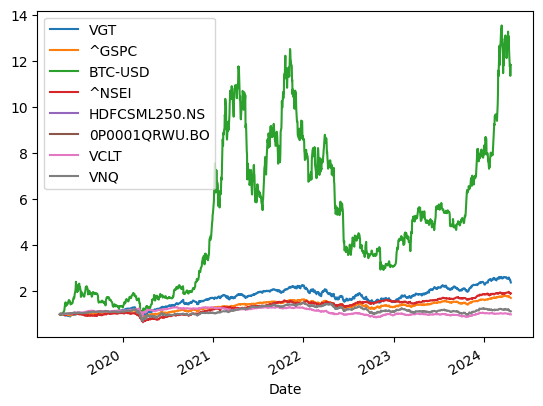

In [307]:
stock_normed = stocks/stocks.iloc[0]
stock_normed.plot()

In [308]:
stock_daily_ret = stocks.pct_change(1)
stock_daily_ret.head()

,VGT,^GSPC,BTC-USD,^NSEI,HDFCSML250.NS,0P0001QRWU.BO,VCLT,VNQ
Date,,,,,,,,
2019-04-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-23,0.011514,0.008841,0.032040,-0.001596,NaN,NaN,0.002980,0.013247
2019-04-24,0.000656,-0.002192,-0.019291,0.012975,NaN,NaN,0.007154,0.007354
2019-04-25,-0.001264,-0.000369,-0.046543,-0.007193,NaN,NaN,-0.000984,-0.002086
2019-04-26,-0.002109,0.004685,0.013210,0.009694,NaN,NaN,0.005032,0.007896


## Log Returns vs Arithmetic Returns

We will now switch over to using log returns instead of arithmetic returns, for many of our use cases they are almost the same,but most technical analyses require detrending/normalizing the time series and using log returns is a nice way to do that.
Log returns are convenient to work with in many of the algorithms we will encounter.

For a full analysis of why we use log returns, check [this great article](https://quantivity.wordpress.com/2011/02/21/why-log-returns/).


In [309]:
log_ret = np.log(stocks/stocks.shift(1))
log_ret.head()

,VGT,^GSPC,BTC-USD,^NSEI,HDFCSML250.NS,0P0001QRWU.BO,VCLT,VNQ
Date,,,,,,,,
2019-04-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-23,0.011449,0.008802,0.031538,-0.001597,NaN,NaN,0.002976,0.013160
2019-04-24,0.000656,-0.002194,-0.019479,0.012892,NaN,NaN,0.007129,0.007327
2019-04-25,-0.001265,-0.000369,-0.047661,-0.007219,NaN,NaN,-0.000984,-0.002088
2019-04-26,-0.002112,0.004674,0.013124,0.009647,NaN,NaN,0.005019,0.007865


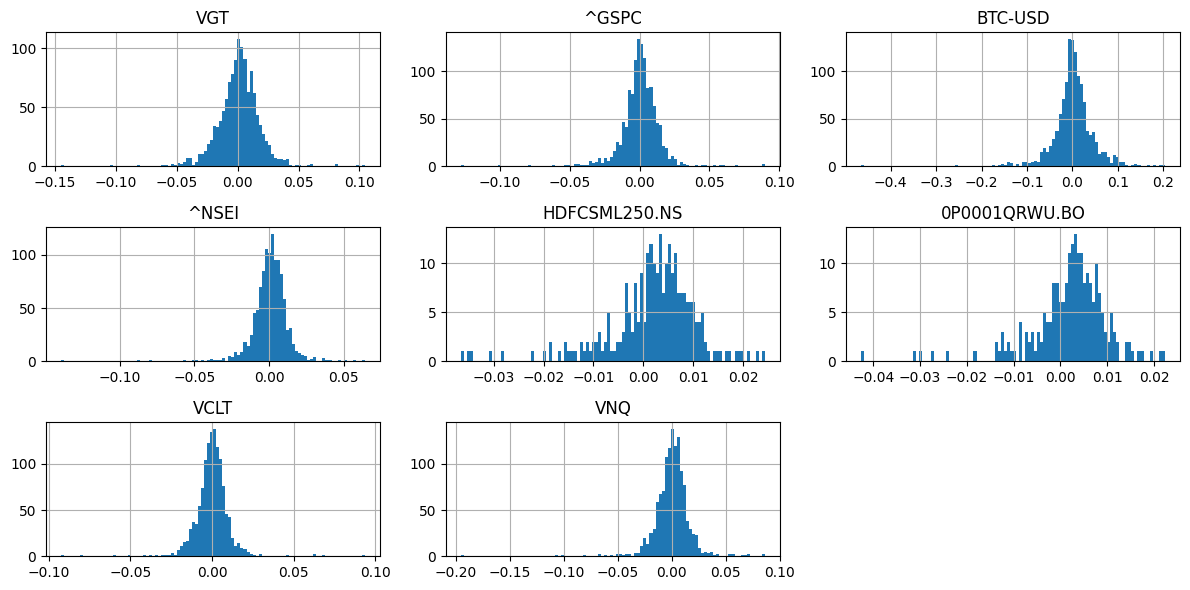

In [310]:
log_ret.hist(bins=100,figsize=(12,6));
plt.tight_layout()

In [311]:
log_ret.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
VGT,1258.0,0.000689,0.017389,-0.144868,-0.007970,0.001338,0.010464,0.104486
^GSPC,1258.0,0.000426,0.013460,-0.127652,-0.005326,0.000815,0.007202,0.089683
BTC-USD,1258.0,0.001964,0.043376,-0.464730,-0.016181,0.000942,0.021709,0.203046
^NSEI,1134.0,0.000646,0.011997,-0.139038,-0.004582,0.001254,0.006892,0.064145
HDFCSML250.NS,256.0,0.001799,0.008938,-0.036497,-0.001531,0.003118,0.007017,0.024335
0P0001QRWU.BO,220.0,0.001932,0.008270,-0.042577,-0.001138,0.002919,0.006572,0.022295
VCLT,1258.0,-0.000002,0.010122,-0.092359,-0.004533,0.000325,0.004833,0.093686
VNQ,1258.0,0.000094,0.016125,-0.195136,-0.006883,0.000743,0.007657,0.086147


In [312]:
log_ret.mean() * 252

VGT              0.173739
^GSPC            0.107252
BTC-USD          0.494816
^NSEI            0.162781
HDFCSML250.NS    0.453446
0P0001QRWU.BO    0.486743
VCLT            -0.000575
VNQ              0.023710
dtype: float64

In [313]:
# Compute pairwise covariance of columns
log_ret.cov()

,VGT,^GSPC,BTC-USD,^NSEI,HDFCSML250.NS,0P0001QRWU.BO,VCLT,VNQ
VGT,0.000302,0.000219,0.000246,0.000054,0.000009,0.000016,0.000055,0.000190
^GSPC,0.000219,0.000181,0.000189,0.000053,0.000006,0.000009,0.000043,0.000176
BTC-USD,0.000246,0.000189,0.001881,0.000063,-0.000045,-0.000046,0.000074,0.000187
^NSEI,0.000054,0.000053,0.000063,0.000144,0.000032,0.000035,0.000014,0.000064
HDFCSML250.NS,0.000009,0.000006,-0.000045,0.000032,0.000080,0.000066,-0.000003,0.000014
0P0001QRWU.BO,0.000016,0.000009,-0.000046,0.000035,0.000066,0.000068,-0.000004,0.000012
VCLT,0.000055,0.000043,0.000074,0.000014,-0.000003,-0.000004,0.000102,0.000064
VNQ,0.000190,0.000176,0.000187,0.000064,0.000014,0.000012,0.000064,0.000260


In [314]:
log_ret.cov()*252 # multiply by days

,VGT,^GSPC,BTC-USD,^NSEI,HDFCSML250.NS,0P0001QRWU.BO,VCLT,VNQ
VGT,0.076198,0.055210,0.062004,0.013710,0.002295,0.003914,0.013920,0.047889
^GSPC,0.055210,0.045655,0.047698,0.013413,0.001420,0.002257,0.010828,0.044331
BTC-USD,0.062004,0.047698,0.474125,0.015836,-0.011296,-0.011498,0.018709,0.047011
^NSEI,0.013710,0.013413,0.015836,0.036267,0.008056,0.008733,0.003540,0.016135
HDFCSML250.NS,0.002295,0.001420,-0.011296,0.008056,0.020134,0.016632,-0.000645,0.003411
0P0001QRWU.BO,0.003914,0.002257,-0.011498,0.008733,0.016632,0.017233,-0.001056,0.002987
VCLT,0.013920,0.010828,0.018709,0.003540,-0.000645,-0.001056,0.025818,0.016025
VNQ,0.047889,0.044331,0.047011,0.016135,0.003411,0.002987,0.016025,0.065521


## Single Run for Some Random Allocation

In [315]:
# Set seed (optional)
np.random.seed(101)

# Stock Columns
print('Stocks')
print(stocks.columns)
print('\n')

# Create Random Weights
print('Creating Random Weights')
weights = np.array(np.random.random(len(stocks.columns.tolist())))
print(weights)
print('\n')

# Rebalance Weights
print('Rebalance to sum to 1.0')
weights = weights / np.sum(weights)
print(weights)
print('\n')

# Expected Return
print('Expected Portfolio Return')
exp_ret = np.sum(log_ret.mean() * weights) *252
print(exp_ret)
print('\n')

# Expected Variance
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
print(exp_vol)
print('\n')

# Sharpe Ratio
SR = exp_ret/exp_vol
print('Sharpe Ratio')
print(SR)


Stocks
Index(['VGT', '^GSPC', 'BTC-USD', '^NSEI', 'HDFCSML250.NS', '0P0001QRWU.BO',
       'VCLT', 'VNQ'],
      dtype='object')


Creating Random Weights
[0.51639863 0.57066759 0.02847423 0.17152166 0.68527698 0.83389686
 0.30696622 0.89361308]


Rebalance to sum to 1.0
[0.12888007 0.14242423 0.00710645 0.04280748 0.17102785 0.20811962
 0.07661102 0.22302328]


Expected Portfolio Return
0.2322477549968159


Expected Volatility
0.13825780464479057


Sharpe Ratio
1.6798165976488821


Great! Now we can just run this many times over!

In [316]:
num_ports = 15000

all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Create Random Weights
    weights = np.array(np.random.random(len(stocks.columns.tolist())))

    # Rebalance Weights
    weights = weights / np.sum(weights)

    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum((log_ret.mean() * weights) *252)

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [317]:
sharpe_arr.max()

3.3435721364407662

In [318]:
sharpe_arr.argmax()

9348

In [319]:
all_weights[1419,:]

array([0.27522946, 0.01925079, 0.10539016, 0.03971925, 0.27288238,
       0.03728338, 0.13908494, 0.11115964])

In [320]:
max_sr_ret = ret_arr[1419]
max_sr_vol = vol_arr[1419]

## Plotting the data

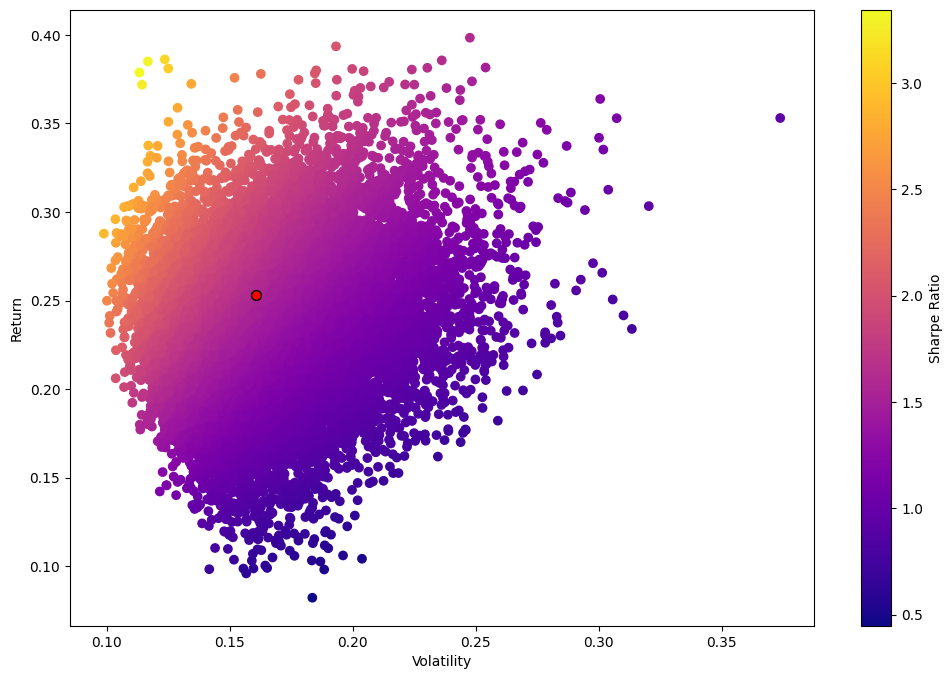

In [321]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add red dot for max SR
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')

# Mathematical Optimization

There are much better ways to find good allocation weights than just guess and check! We can use optimization functions to find the ideal weights mathematically!

### Functionalize Return and SR operations

In [322]:
def get_ret_vol_sr(weights):
    """
    Takes in weights, returns array or return,volatility, sharpe ratio
    """
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [323]:
from scipy.optimize import minimize

To fully understand all the parameters, check out:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html

In [324]:
help(minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where ``x`` is a 1-D array with shape (n,) and ``args``
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where ``n`` is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead' :ref:`(see he

Optimization works as a minimization function, since we actually want to maximize the Sharpe Ratio, we will need to turn it negative so we can minimize the negative sharpe (same as maximizing the postive sharpe)

In [325]:
def neg_sharpe(weights):
    return  get_ret_vol_sr(weights)[2] * -1

In [326]:
# Contraints
def check_sum(weights):
    '''
    Returns 0 if sum of weights is 1.0
    '''
    return np.sum(weights) - 1

In [327]:
# By convention of minimize function it should be a function that returns zero for conditions
cons = ({'type':'eq','fun': check_sum})

In [328]:
# 0-1 bounds for each weight
bounds = [(0, 0.4) for _ in range(len(tickers))]

In [329]:
# Initial Guess (equal distribution)
init_guess = np.array([1/len(tickers)]*len(tickers))

In [330]:
# Sequential Least SQuares Programming (SLSQP).
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

In [331]:
opt_results

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -3.6345787507223988
       x: [ 0.000e+00  3.732e-02  5.053e-02  3.041e-03  4.000e-01
            4.000e-01  1.091e-01  0.000e+00]
     nit: 9
     jac: [ 1.140e+00  1.026e+00  1.027e+00  1.027e+00  6.518e-02
           -5.784e-01  1.026e+00  2.236e+00]
    nfev: 84
    njev: 9

In [332]:
opt_results.x

array([0.        , 0.03731994, 0.05052586, 0.00304054, 0.4       ,
       0.4       , 0.10911366, 0.        ])

In [333]:
get_ret_vol_sr(opt_results.x)

array([0.40551155, 0.11157044, 3.63457875])

# All Optimal Portfolios (Efficient Frontier)

The efficient frontier is the set of optimal portfolios that offers the highest expected return for a defined level of risk or the lowest risk for a given level of expected return. Portfolios that lie below the efficient frontier are sub-optimal, because they do not provide enough return for the level of risk. Portfolios that cluster to the right of the efficient frontier are also sub-optimal, because they have a higher level of risk for the defined rate of return.

Efficient Frontier http://www.investopedia.com/terms/e/efficientfrontier

In [334]:
# Our returns go from 0 to somewhere along 0.3
# Create a linspace number of points to calculate x on
frontier_y = np.linspace(0,0.3,100) # Change 100 to a lower number for slower computers!

In [335]:
def minimize_volatility(weights):
    return  get_ret_vol_sr(weights)[1]

In [336]:
frontier_volatility = []

for possible_return in frontier_y:
    # function for return
    cons = ({'type':'eq','fun': check_sum},
            {'type':'eq','fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})

    result = minimize(minimize_volatility,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

    frontier_volatility.append(result['fun'])

In [337]:
optimal_weights = result.x

print("Optimal Weights:")
for ticker, weight in zip(tickers, optimal_weights):
    print(f"{ticker}: {weight:.4f}")

Optimal Weights:
VGT: 0.0000
^GSPC: 0.0628
BTC-USD: 0.0169
^NSEI: 0.0517
HDFCSML250.NS: 0.1807
0P0001QRWU.BO: 0.4000
VCLT: 0.2879
VNQ: 0.0000


In [341]:
# Expected Return
print('Expected Portfolio Return')
exp_ret = np.sum(log_ret.mean() * optimal_weights) *252
print(exp_ret)
print('\n')

# Expected Variance
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(optimal_weights.T, np.dot(log_ret.cov() * 252, optimal_weights)))
print(exp_vol)
print('\n')

# Sharpe Ratio
SR = exp_ret/exp_vol
print('Sharpe Ratio')
print(SR)

Expected Portfolio Return
0.2999999999912571


Expected Volatility
0.09689706055353735


Sharpe Ratio
3.0960691508851474


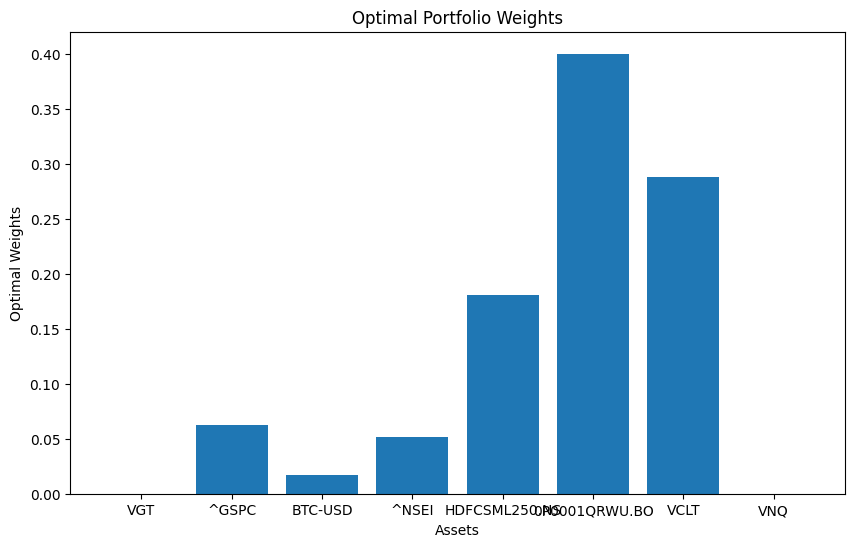

In [339]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(tickers, optimal_weights)

plt.xlabel('Assets')
plt.ylabel('Optimal Weights')
plt.title('Optimal Portfolio Weights')

plt.show()

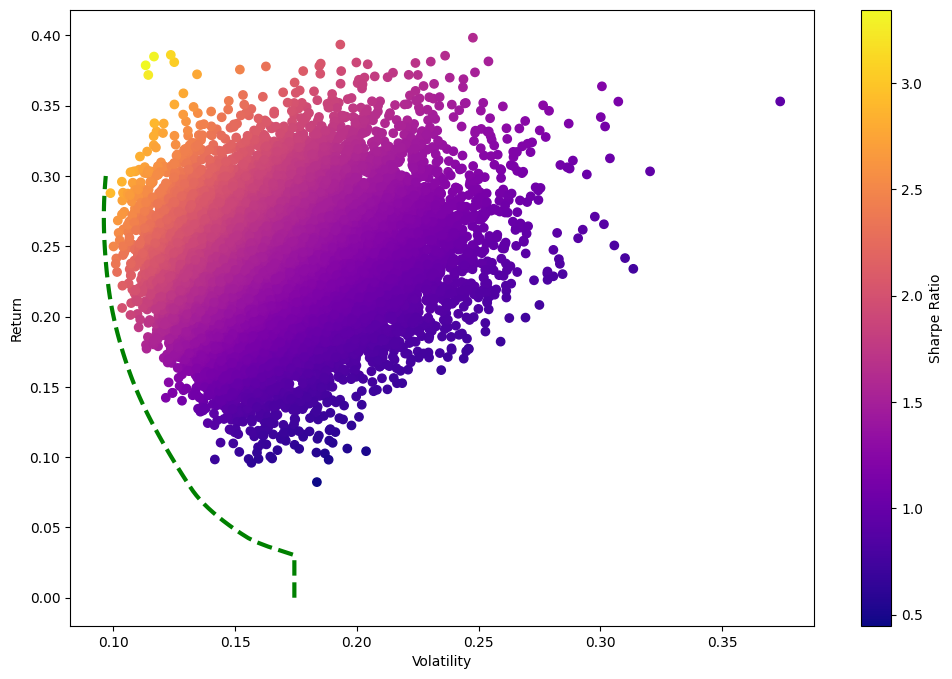

In [340]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')



# Add frontier line
plt.plot(frontier_volatility,frontier_y,'g--',linewidth=3)